# Water Quality Prediction - EDA

### Importing the libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [30]:
df = pd.read_csv('water_potability.csv')

In [31]:
df.shape

(3276, 10)

The dataset consists of 3276 rows and 10 columns

In [32]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [33]:
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [38]:
df.sample(5)

ph    Hardness        Solids  Chloramines     Sulfate  \
2934  6.657794  205.543176  18844.037031     6.734228  363.397930   
1424  5.064042  214.529328  21035.106855     9.134813         NaN   
672   8.141430  211.794267  15494.359837     9.450414         NaN   
3054  9.065894  164.674803  20260.403692     7.588175  304.567537   
1761       NaN  208.367046  22444.090068     5.404248  338.063690   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2934    555.899038        8.006966        66.934782   3.868926           0  
1424    471.178109       13.333518        58.194222   5.122703           0  
672     363.129353       15.403390        54.490733   4.350922           1  
3054    408.901270       10.178500        84.723107   4.299503           0  
1761    540.899540        9.980418        84.570083   3.594444           0

### Data Cleaning

In [6]:
#Finding null values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
#Dropping the null values
df = df.dropna()

In [8]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [10]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2011.000000  2011.000000   2011.000000  2011.000000  2011.000000   
mean      7.085990   195.968072  21917.441374     7.134338   333.224672   
std       1.573337    32.635085   8642.239815     1.584820    41.205172   
min       0.227499    73.492234    320.942611     1.390871   129.000000   
25%       6.089723   176.744938  15615.665390     6.138895   307.632511   
50%       7.027297   197.191839  20933.512750     7.143907   332.232177   
75%       8.052969   216.441070  27182.587067     8.109726   359.330555   
max      14.000000   317.338124  56488.672413    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2011.000000     2011.000000      2011.000000  2011.000000  2011.000000  
mean     426.526409       14.357709        66.400859     3.969729     0.403282  
std       80.712572        3.324959        16.077109     0.780346     0.490678  
min      201.619737        2.200000         8.577013     1.450000     0.000000  
25%      366.680307       12.124105        55.952664     3.442915     0.000000  
50%      423.455906       14.322019        66.542198     3.968177     0.000000  
75%      482.373169       16.683049        77.291925     4.514175     1.000000  
max      753.342620       27.006707       124.000000     6.494749     1.000000

In [11]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [12]:
#Finding the datatypes of the columns
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

### Data Analysis and Visualization

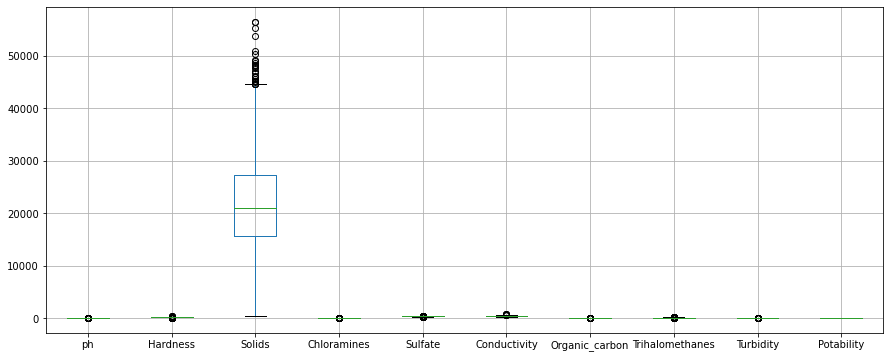

In [13]:
#Checking for the Outliers
df.boxplot(figsize = (15,6))
plt.show()

Not removing the outliers beacuse they may be important in deciding the quality of the water.

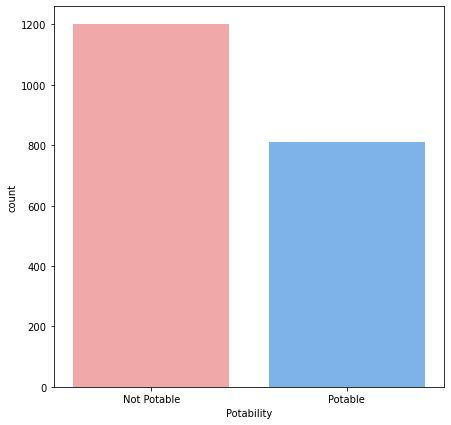

In [27]:
#Plotting the count for the potability column
colors = ["#ff9999", "#66b3ff"]
ax = sns.countplot(x="Potability", data=df, palette=colors, saturation=0.7)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [23]:
#plotting the distribution of the water
d = pd.DataFrame(df["Potability"].value_counts())
fig = px.pie(d, values = "Potability", names = ["Not Potable", "Potable"], hole = 0.35, opacity = 0.8,
            labels = {"label" :"Potability","Potability":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of Potability Feature"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

C:\Users\bhima\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhima\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Potability', ylabel='ph'>

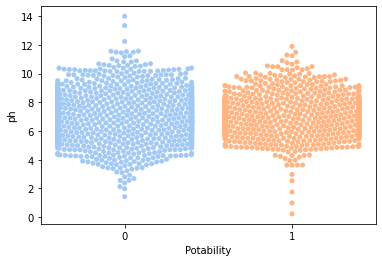

In [15]:
#Finding the potability of the water according to the ph value
sns.swarmplot(x='Potability', y='ph', data=df, palette='pastel')

<AxesSubplot:>

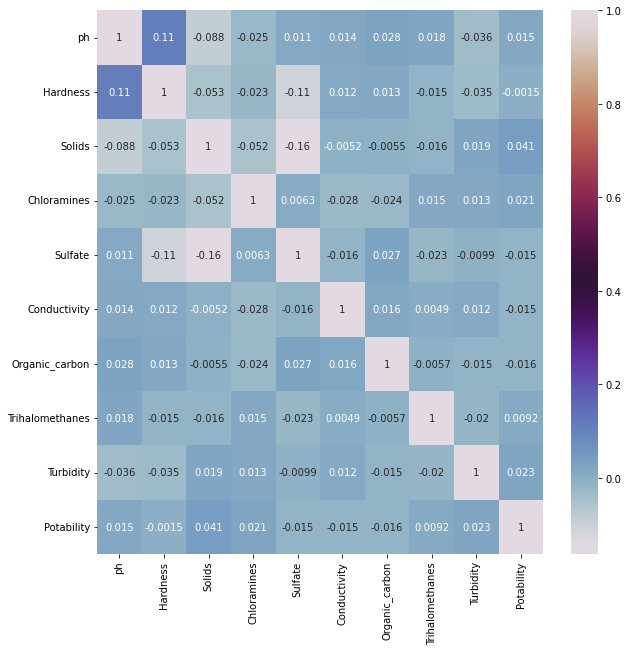

In [16]:
#Plotting the correlation between Potability and other  factors afftecing it
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot= True, cmap='twilight')

The Potability column of this dataset is the column, we need to predict because it contains values 0 and 1 that indicate whether the water is potable (1) or unfit (0) for consumption. 

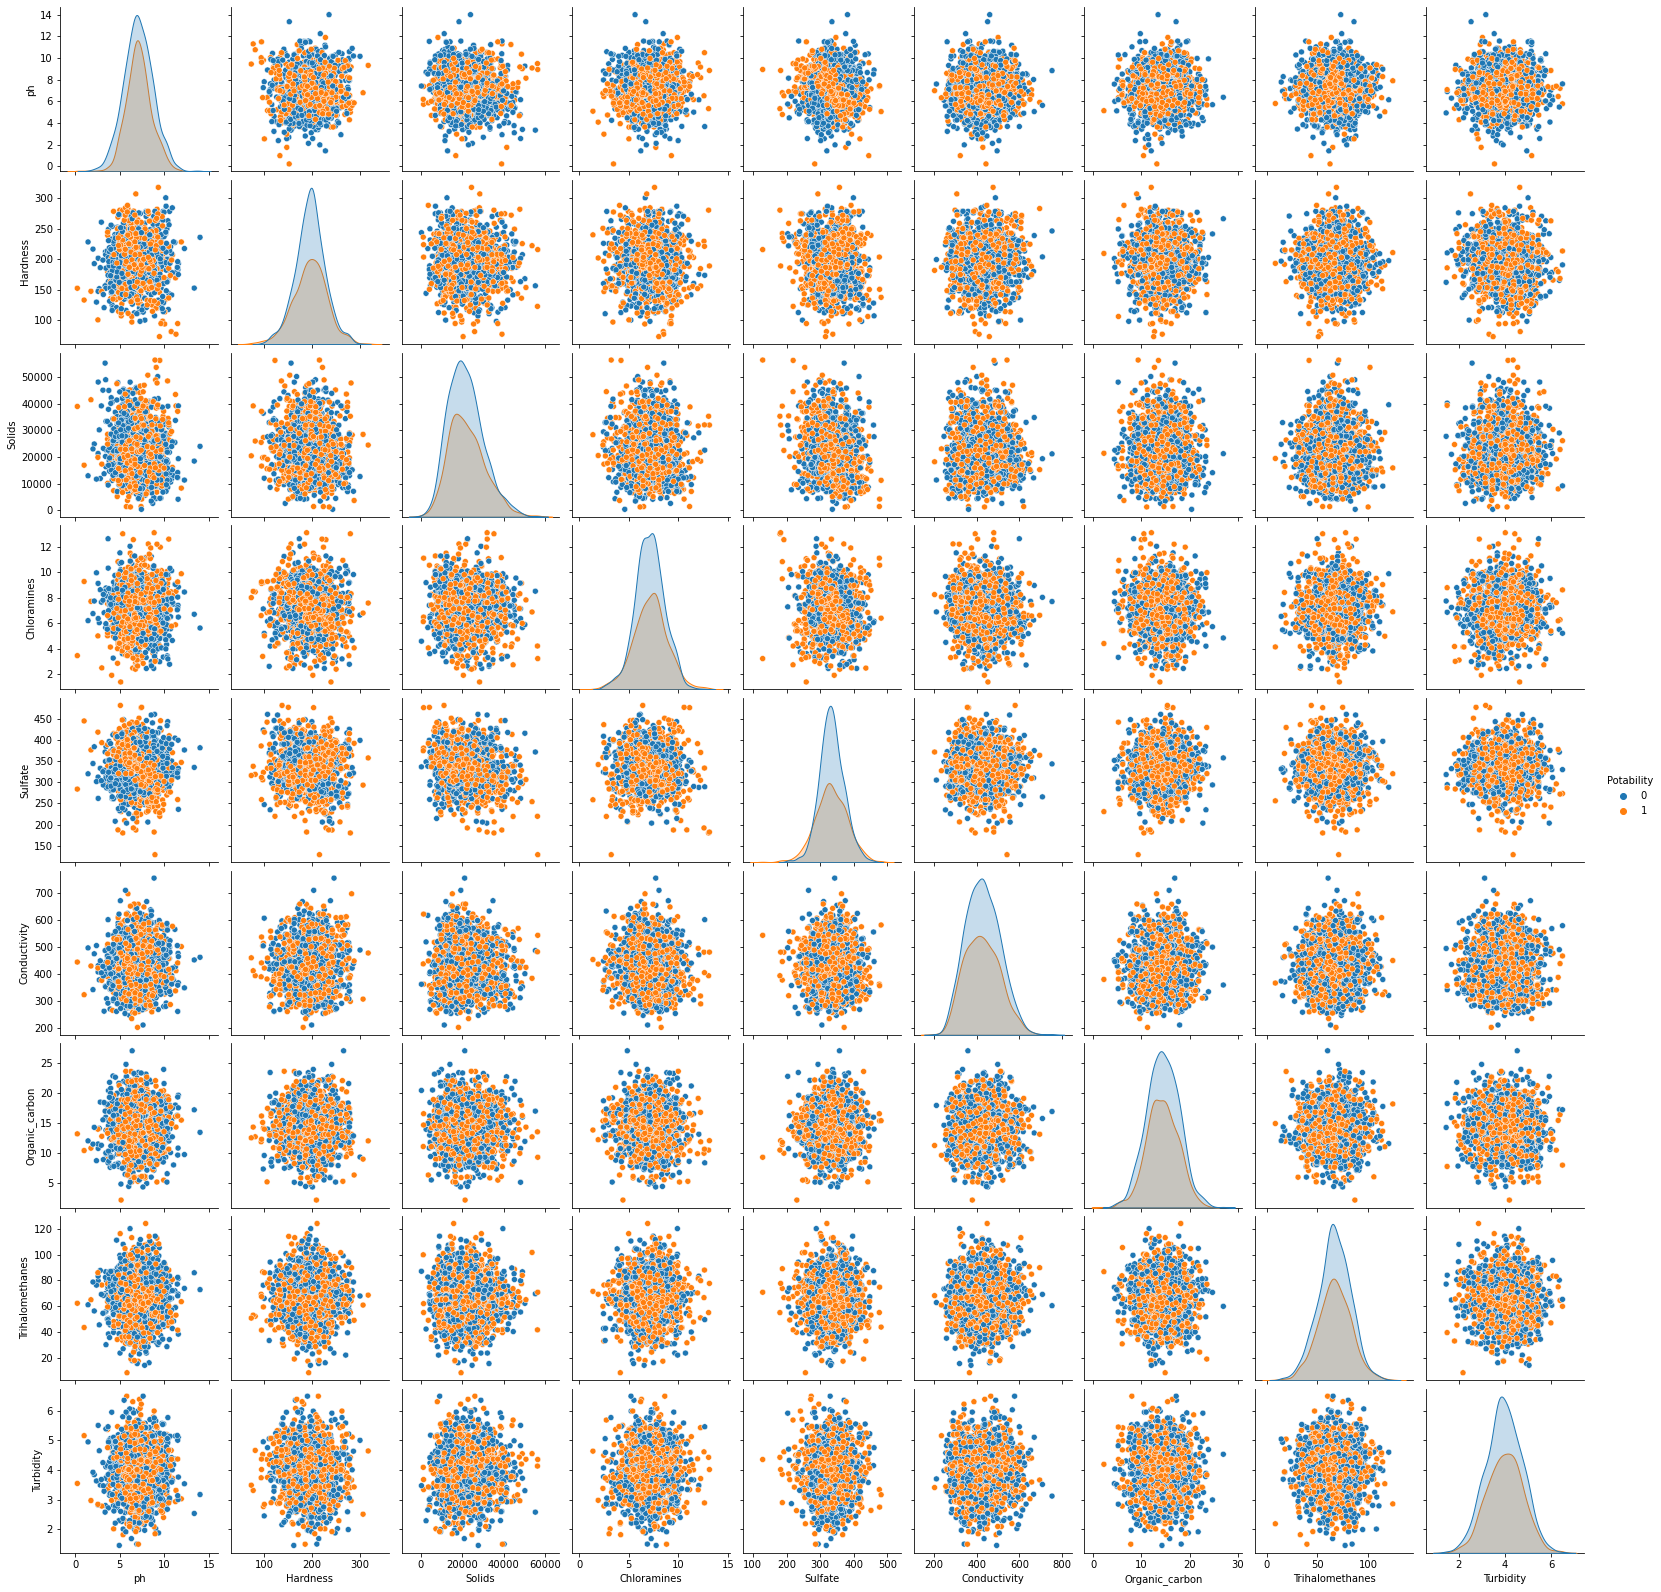

In [17]:
sns.pairplot(df, hue="Potability")

This is normal distribution

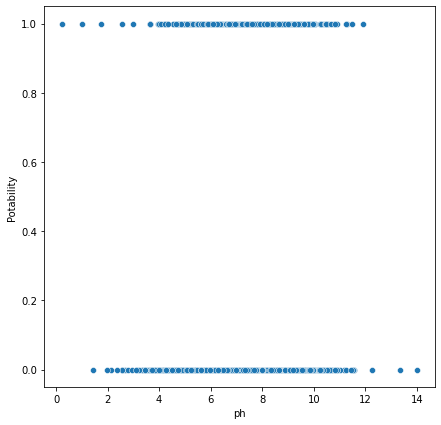

In [24]:
sns.scatterplot(x = df['ph'], y = df['Potability'])
plt.show()

For more ph values, the water quality is good and once it goes over 12 the water is not suitable for drinking

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

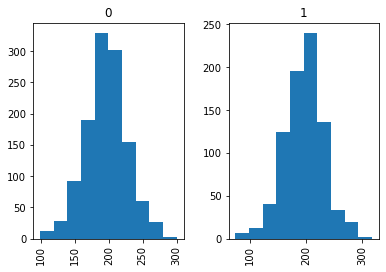

In [18]:
#Plotting the factors affecting the potability of the water
df.hist(column='Hardness', by='Potability')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

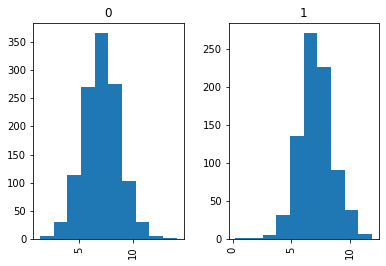

In [19]:
df.hist(column='ph', by='Potability')

C:\Users\bhima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Potability', ylabel='Density'>

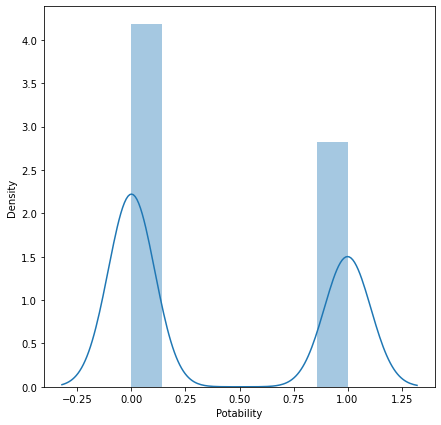

In [20]:
plt.rcParams['figure.figsize'] = [7,7]
sns.distplot(df['Potability'])

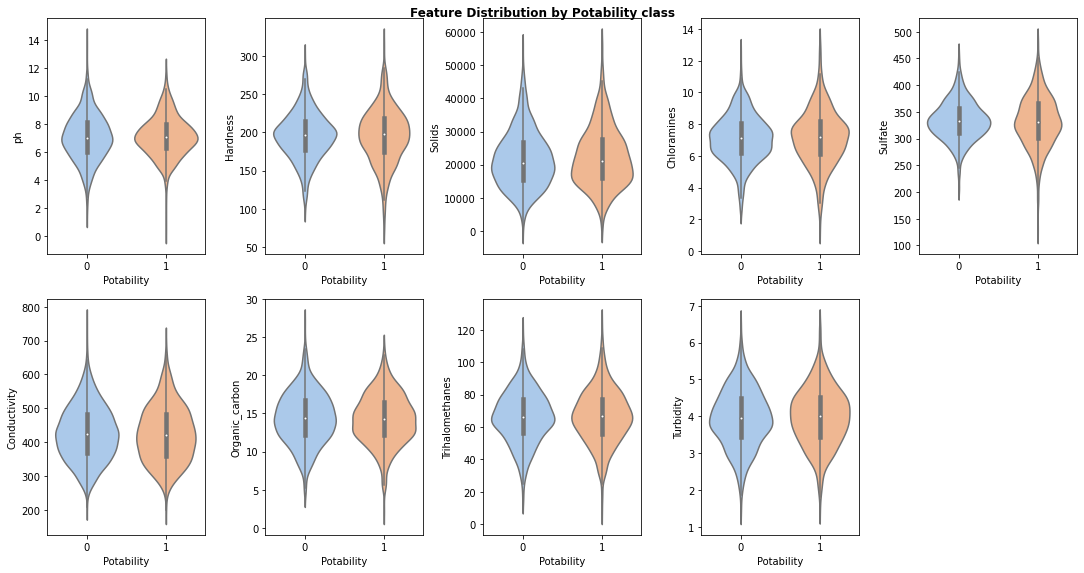

In [25]:
plt.figure(figsize=(15, 8))
plt.suptitle('Feature Distribution by Potability class', weight = 'bold')
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 5, i + 1)
    sns.violinplot(x='Potability', y=col, data=df, palette='pastel')
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=1.0)
plt.show()

We can clearly see the difference in the water classification. Distribution of non potable water is high on conductivity compared to potable water and the same is applicable to Turbidity and Trihalomethanes.

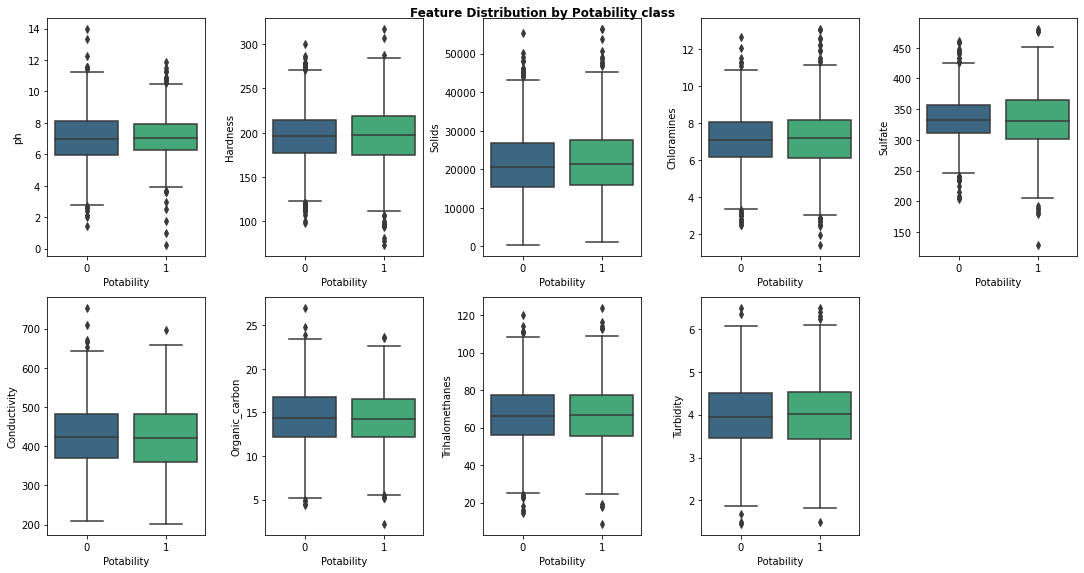

In [26]:
plt.figure(figsize=(15, 8))
plt.suptitle('Feature Distribution by Potability class', weight = 'bold')
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(x='Potability', y=col, data=df, palette='viridis')
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=1.0)
plt.show()